In [1]:
from similarityfunctions import *
import networkx as nx

In [2]:
dg = makeDirectedGraph(6, 4)

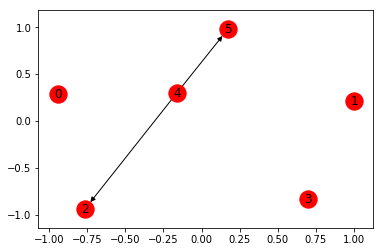

In [3]:
nx.draw_networkx(dg)

In [4]:
# add observations to a graph
def observeData(graph, true_nodes, false_nodes):
    nodes = graph.nodes()
    for i in nodes:
        if i in true_nodes:
            graph.nodes[i]['value'] = True
        if i in false_nodes:
            graph.nodes[i]['value'] = False
        else:
            graph.nodes[i]['value'] = 0

In [5]:
observeData(dg, [1, 4], [3])

In [6]:
dg.nodes()

NodeView((0, 1, 2, 3, 4, 5))

In [7]:
# adds new true nodes and new false nodes to the graph and then checks for contradictions
# only finds direct contraidctions? Should talk with group about this.
import copy 
def findContradictions(graph, new_true_nodes, new_false_nodes, threshold=.5):
    new_g = copy.deepcopy(graph)
    observeData(new_g, new_true_nodes, new_false_nodes)
    edge_attrs = nx.get_edge_attributes(new_g, 'weight')
    for i in new_g.nodes():
        if 'observed' in new_g.nodes.data()[i]:
            if new_g.nodes.data()[i]['observed'] is True:
                for x in edge_attrs:
                    print(x, x[1], new_g.nodes.data()[x[1]], edge_attrs[x])
                    if 'observed' in new_g.nodes.data()[x[1]]:
                        if x[0] == i and new_g.nodes.data()[x[1]]['observed'] is False and edge_attrs[x] >= threshold:
                            return (i, True, x[1], False, edge_attrs[x])
    return "No contradictions found"

In [8]:
findContradictions(dg, [], [0])

'No contradictions found'

In [64]:
class CPT(object):
    """
    Defines a CPT Class
    """
    def __init__(self, num_parents):
        self.num_parents = num_parents
        self.CPTable = self.make_table()
        
    def make_table(self):
        CPTable = {}
        for i in range(2**self.num_parents):
            CPTable[bin(i)] = 0.0
        return CPTable
    
    def add_entry(self, parent_values, prob):
        # values of nodes sorted in alphabetical order
        key = ''
        for i in parent_values:
            key += str(i)
        self.CPTable[bin(int(key, 2))] = prob     
    
    def get_entry(self, parent_values)
        key = ''
        for i in parent_values:
            key += str(i)
        return self.CPTable[bin(int(key, 2))]
    
    def get_table(self):
        return self.CPTable

In [68]:
myCPT = CPT(2)
myCPT.add_entry([0, 1], .6)
print(myCPT.get_table())

{'0b0': 0.0, '0b1': 0.6, '0b10': 0.0, '0b11': 0.0}


In [30]:
def getMarkovBlanket(graph, obs, hyp):
    #generates a new graph (markov blanket) based on the graph, observations, and hypothesis
    #get all parent nodes
    edge_attrs = nx.get_edge_attributes(graph, 'weight')
    new_graph = nx.DiGraph()
    new_graph.add_node(hyp)
    new_graph.add_nodes_from(obs)
    for i in edge_attrs:
        if i[0] in obs or i[0] == hyp:
            new_graph.add_node(i[1])
            new_graph.add_edge(i[0], i[1], weight=edge_attrs[i])
        if i[1] in obs or i[1] == hyp:
            new_graph.add_node(i[0])
            new_graph.add_edge(i[0], i[1], weight=edge_attrs[i])
    return new_graph

In [31]:
graph = getMarkovBlanket(dg, [4], 1)

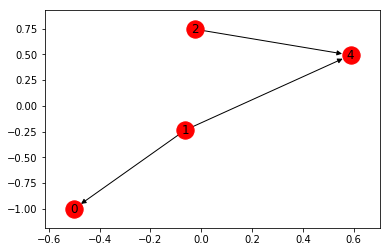

In [32]:
nx.draw_networkx(graph)

## Criteria for Hypothesis
We want a hypothesis that is:
- Simple. As few nodes as possible.
- Probable. Should have a high probability of being true

In [ ]:
def calculateNodeProbability(graph, node, parent_values):
    return graph.nodes()[node][['CPT']].get_entry(parent_values)

In [69]:
list(dg.predecessors(5))

[4]

In [78]:
def calculateTotalProbability(blanket, hyp, obs):
    #calculate node probability given children
    # want to calculate hyp | obs
    prob = 0
    for i in blanket.nodes():
        total = 1
        if not (i == hyp or i in obs):
            total *= graph.nodes()[i][['CPT']].get_entry(parent_values)
            
        prob += total
        

SyntaxError: invalid syntax (<ipython-input-78-895e7e299eb6>, line 7)

In [79]:
# sees if some nodes are independent based on the nodes we are conditioning on
# we are only checking for *direct* conditions. chains are not accounted for
# since in baysien networks edges are "direct dependence." Should double-check this.
def independenceChecker(graph, conditions, nodes):
    edges = nx.get_edge_attributes(graph, 'weight')
    for i in edges:
        if i[1] in nodes and not i[0] in conditions:
            return False
    return True

In [80]:
def findHypotheses(graph, true_nodes, false_nodes):
    hyps = []
    for i in graph.nodes():
        children = get_all_children(graph, i, {}, 1)
        if all(item in children.keys() for item in true_nodes) and not any(item in children.keys() for item in false_nodes):
            hyps.append(i)
    return hyps

In [81]:
def findBestExplanation(graph, true_nodes, false_nodes):
    hyps = findHypothesis(graph, true_nodes, false_nodes)

In [83]:
findHypotheses(dg, [0], [])

[2, 4]